Solving the 'Hundred-digit Challenge problem' 4.
https://en.wikipedia.org/wiki/Hundred-dollar,_Hundred-digit_Challenge_problems
This is an global optimization problem since the function has many local minima. The problem is solved using simulated anneling (Metropolis). A baysian optimizer is used for tuning the hyperparameters: step size and temperature.

In [71]:
#!pip install bayesian-optimization

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization

The objective function

In [73]:
def dollar(x):
  return np.exp(np.sin(x[0]))+np.sin(60*np.exp(x[1]))+np.sin(70*np.sin(x[0]))+np.sin(np.sin(80*x[1]))-np.sin(10*(x[0]+x[1]))+1/4*(x[0]**2+x[1]**2)

The sumulated anneling algorithm (SA). 'outer_iter' and 'traning' is used for the bayseian optimiser and tells the algorithm to run several times to get a mean value since SA is a stochastic algorithm.

In [74]:
def simulated_annealing(objective, size, start, bounds, n_iterations, step_size, temp, outer_iter, training = False):
  try:
    if size !=len(bounds):
      print("Bounds does not match size of problem")
      raise ValueError
  except:
    pass
  best_list = []
  best_eval_list = []

  start_r = start
  
  for i in range(outer_iter):
    start = start_r
    if start == None and bounds != None:
      start = [np.random.uniform(i[0],i[1]) for i in bounds]
    if start == None:
      start = np.random.normal(size=size)

    best = start
    best_eval = objective(start)
    curr, curr_eval = best, best_eval
    
    def bound_enforce(arr,bounds=bounds):
      if bounds == None:
        return arr
      for i in range(size):
          arr[i] = max(min(arr[0],bounds[i][1]),bounds[i][0])
      return arr

    for i in range(n_iterations):
      candidate = curr + np.random.normal(size=size) * step_size
      candidate = bound_enforce(candidate)

      candidate_eval = objective(candidate)

      if candidate_eval < best_eval:
        best, best_eval = candidate, candidate_eval

      diff = candidate_eval - curr_eval

      t = temp / float(i + 1)
      metropolis = np.exp(-diff / t)

      if diff < 0 or np.random.uniform() < metropolis:
        curr, curr_eval = candidate, candidate_eval
    
    best_list.append(best)
    best_eval_list.append(best_eval)
  if training == True:
    return np.mean(best_eval_list)
  if training == False:
    return best_list,best_eval_list


In [75]:
best, best_eval = simulated_annealing(dollar,2,None,None,1000,0.1,100, 1)
print("Solution vector:", best)
print("Objective:", best_eval)
print("Best Objective found: −3.306868647")

Solution vector: [array([-0.83411474,  0.99240415])]
Objective: [-2.7841977580778074]
Best Objective found: −3.306868647


In [76]:
def bay_opt(step_size,temp):
  return -simulated_annealing(dollar, 2, None, None, 1000, step_size, temp, 10, training = True)

In [77]:
optimizer = BayesianOptimization(
    f=bay_opt,
    pbounds = {'step_size': (0.001, 1), 'temp': (0, 1000)}
)

optimizer.maximize(
    init_points=10,
    n_iter=100,
)

|   iter    |  target   | step_size |   temp    |
-------------------------------------------------
|  1        |  2.623    |  0.3328   |  120.6    |
|  2        |  2.508    |  0.8042   |  281.5    |
|  3        |  2.699    |  0.8016   |  249.9    |
|  4        |  2.367    |  0.1528   |  299.0    |
|  5        |  2.615    |  0.6003   |  490.0    |
|  6        |  2.511    |  0.5697   |  647.5    |
|  7        |  2.33     |  0.9687   |  650.2    |
|  8        |  2.684    |  0.6605   |  77.98    |
|  9        |  2.385    |  0.2596   |  827.1    |
|  10       |  2.62     |  0.153    |  865.1    |
|  11       |  2.653    |  0.9541   |  248.2    |
|  12       |  2.357    |  0.1081   |  253.3    |
|  13       |  2.419    |  0.3837   |  79.9     |
|  14       |  1.95     |  0.04879  |  249.1    |
|  15       |  2.219    |  0.1956   |  225.7    |
|  16       |  2.525    |  0.6543   |  553.8    |
|  17       |  0.4914   |  0.002045 |  180.0    |
|  18       |  2.622    |  0.8675   |  283.3    |


In [78]:
print('Parameters',optimizer.max['params'] )
print('Objective', -1*optimizer.max['target'])
print("Best Objective found: −3.306868647")

Parameters {'step_size': 0.8015916154084265, 'temp': 249.88645995275917}
Objective -2.6990860714974234
Best Objective found: −3.306868647


In [79]:
best, best_eval = simulated_annealing(dollar,2,None,None,1000,optimizer.max['params']['step_size'],optimizer.max['params']['temp'], 1)
print("Solution vector:", best[0])
print("Objective:", best_eval[0])
print("Best Objective found: −3.306868647")

Solution vector: [-0.59757892 -0.49606282]
Objective: -2.9820230700288413
Best Objective found: −3.306868647


Ploting the function as the best solution found.

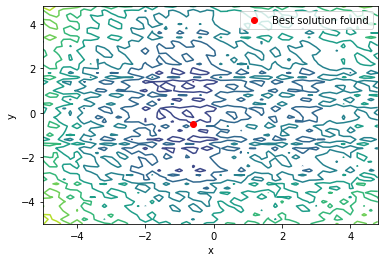

In [80]:
x = np.arange(-5,5, 0.2)
y = feature_x = np.arange(-5,5, 0.2)
  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(x, y)

fig, ax = plt.subplots(1, 1)
  
Z = dollar([X, Y])
  
# plots contour lines
ax.contour(X, Y, Z)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(best[0][0],best[0][1],'ro', color ='r', label = 'Best solution found')
ax.legend()
plt.show()